In [1]:
import numpy as np
import pandas as pd
import atoti as tt

Welcome to atoti 0.7.1!

By using this community edition, you agree with the license available at https://docs.atoti.io/latest/eula.html.
Browse the official documentation at https://docs.atoti.io.
Join the community at https://www.atoti.io/register.

atoti collects telemetry data, which is used to help understand how to improve the product.
If you don't wish to send usage data, set the ATOTI_DISABLE_TELEMETRY environment variable to True.

You can hide this message by setting the ATOTI_HIDE_EULA_MESSAGE environment variable to True.


## Import dan membersihkan data

In [2]:
assessments = pd.read_csv('assessments.csv')
courses = pd.read_csv('courses.csv')
studentAssessment = pd.read_csv('studentAssessment.csv')
studentInfo = pd.read_csv('studentInfo.csv')
studentRegistration = pd.read_csv('studentRegistration.csv')
studentVle =pd.read_csv('studentVle.csv',)
vle = pd.read_csv('vle.csv')

### Mengubah id menjadi string - supaya kolom id tidak ikut diagregasi oleh atoti
n.b. atoti mengagregasi berdasarkan kolom yang bertipe numerik

In [3]:
##### vle #####
vle['id_site'] = vle['id_site'].astype("string")
vle = vle.drop(['week_from','week_to'],axis=1)

In [4]:
vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id_site            6364 non-null   string
 1   code_module        6364 non-null   object
 2   code_presentation  6364 non-null   object
 3   activity_type      6364 non-null   object
dtypes: object(3), string(1)
memory usage: 199.0+ KB


In [5]:
##### studentVle #####
studentVle['id_site'] = studentVle['id_site'].astype("string")
studentVle['id_student'] = studentVle['id_student'].astype("string")

In [6]:
studentVle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         string
 3   id_site            string
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(2), object(2), string(2)
memory usage: 487.8+ MB


In [7]:
##### studentInfo ######
studentInfo['id_student'] = studentInfo['id_student'].astype("string")

In [8]:
studentInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  string
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(2), object(9), string(1)
memory usage: 3.0+ MB


In [9]:
##### assessments #####
assessments['id_assessment'] = assessments['id_assessment'].astype("string")

In [10]:
assessments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    string 
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), object(3), string(1)
memory usage: 9.8+ KB


In [11]:
##### studentAssessment #####
studentAssessment['id_student'] = studentAssessment['id_student'].astype("string")
studentAssessment['id_assessment'] = studentAssessment['id_assessment'].astype("string")

In [12]:
studentAssessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  string 
 1   id_student      173912 non-null  string 
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(2), string(2)
memory usage: 6.6 MB


### Menambahkan kolom untuk memperjelas hierarchies 
n.b. hal ini dilakukan supaya nantinya mempermudah proses analisis dengan metode dice

In [13]:
### Membuat hirarki untuk superset dari imd_band
def categorise(row):
    if row['imd_band'] == '0-10%' or row['imd_band']=='10-20' or row['imd_band'] == '20-30%':
        return 'Most Deprived'
    elif row['imd_band'] == '30-40%' or row['imd_band']=='40-50%' or row['imd_band'] == '50-60%' or row['imd_band'] == '60-70%':
        return 'Medium Deprived'
    elif  row['imd_band']=='70-80%' or row['imd_band'] == '80-90%' or  row['imd_band'] == '90-100%':
        return 'Least Deprived'
    return 'nan'
studentInfo['imd_level'] = studentInfo.apply(lambda row: categorise(row), axis=1)

In [14]:
### Membuat hirarki untuk superset dari region
def categorise(row):
    if row['region']=='Scotland' or row['region']=='North Western Region' or row['region']=='North Region' or row['region']=='North Region':
        return 'Northern Region'
    else:
        return 'Southern Region'
    return 'nan'
studentInfo['general_region'] = studentInfo.apply(lambda row: categorise(row), axis=1)

In [15]:
studentInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  string
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
 12  imd_level             32593 non-null  object
 13  general_region        32593 non-null  object
dtypes: int64(2), object(11), string(1)
memory usage: 3.5+ MB


## Membersiapkan cube dan data lain

### Membuat session untuk masing-masing tabel

In [16]:
session = tt.Session()

In [17]:
studentAssessment_session = session.read_pandas(studentAssessment, table_name = "studentAssessment")

In [18]:
studentAssessment_session.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,100893,17,0,63.0
2,1752,106247,32,0,67.0
3,1752,127582,26,0,69.0
4,1752,142326,17,0,65.0


In [19]:
courses_session = session.read_pandas(courses, table_name = "courses")

In [20]:
courses_session.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,GGG,2014J,269
2,AAA,2014J,269
3,FFF,2014J,269
4,BBB,2013J,268


In [21]:
studentInfo_session = session.read_pandas(studentInfo, table_name = "Studentinfo")

In [22]:
studentInfo_session.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,imd_level,general_region
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,Least Deprived,Southern Region
1,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,Medium Deprived,Southern Region
2,AAA,2013J,65002,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,60,N,Withdrawn,Least Deprived,Southern Region
3,AAA,2013J,94961,M,South Region,Lower Than A Level,70-80%,35-55,0,60,N,Withdrawn,Least Deprived,Southern Region
4,AAA,2013J,101781,M,South Region,Lower Than A Level,80-90%,35-55,0,60,N,Pass,Least Deprived,Southern Region


In [23]:
assessments_session = session.read_pandas(assessments, table_name = "assessments")

In [24]:
assessments_session.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1755,TMA,166.0,20.0
2,AAA,2014J,1758,TMA,19.0,10.0
3,AAA,2014J,1760,TMA,117.0,20.0
4,AAA,2014J,1761,TMA,166.0,20.0


### Membuat cube

In [25]:
cube = session.create_cube(studentAssessment_session)

### Melakukan join beberapa tabel yang penting dan yang akan dicari insightnya

In [26]:
studentInfo_session.join(courses_session, mapping = {"code_module": "code_module"})

In [27]:
studentAssessment_session.join(assessments_session, mapping={"id_assessment":"id_assessment"})

In [28]:
studentAssessment_session.join(studentInfo_session, mapping = {"id_student": "id_student"})

### Menambahkan hirarki kustom sebagai pelengkap

In [29]:
hrc = cube.hierarchies
l = cube.levels
m = cube.measures
hrc

Hierarchies(_create_hierarchy_from_arguments=<bound method Cube._create_hierarchy_from_arguments of Cube(_name='studentAssessment', _hierarchies=..., _measures=Measures())>, _cube_name='studentAssessment')

In [30]:
hrc['imd'] = [l['imd_level'],l['imd_band']]
hrc['regions'] = [l['general_region'],l['region']]

In [31]:
del hrc['imd_level']
del hrc['imd_band']
del hrc['general_region']
del hrc['region']
hrc

Hierarchies(_create_hierarchy_from_arguments=<bound method Cube._create_hierarchy_from_arguments of Cube(_name='studentAssessment', _hierarchies=..., _measures=Measures())>, _cube_name='studentAssessment')

### Skema akhir

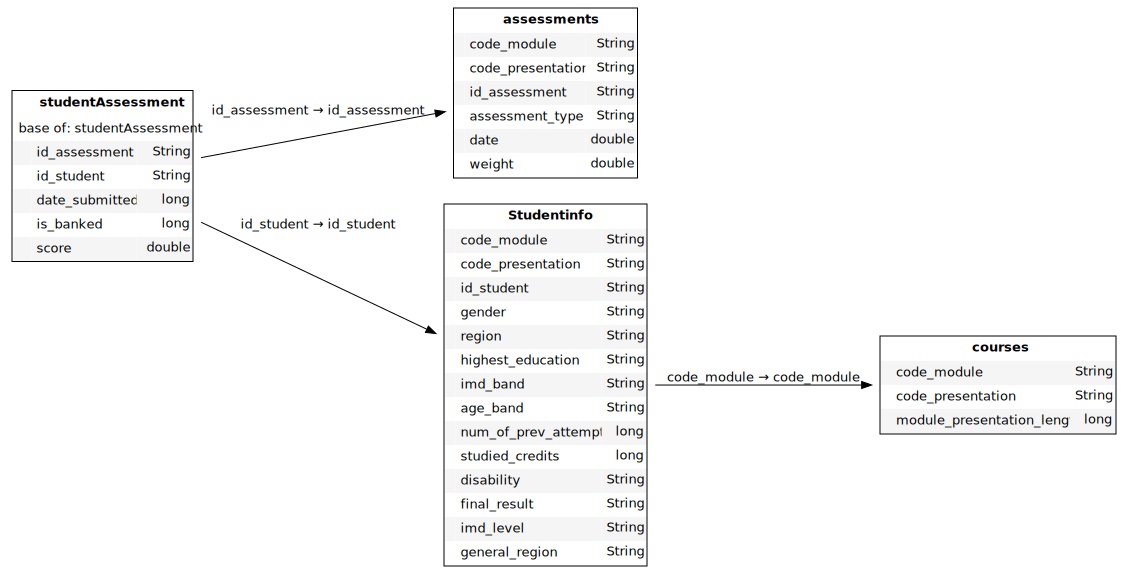

In [32]:
session.tables.schema

## Presentasi data

### Demo slice, drill down, roll up dan dice pada atoti

In [33]:
### Melihat skor rata-rata dalam dimensi region dan jenis modul (slice)
### dapat dilihat bahwa hirarki region tersusun dari beberapa sub-region yang dapat di-expand untuk melihat lebih detail. 
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [52]:
### Meminimize dimensi region untuk menampilkan data tertentu misal hanya daerah Northern Region saja (dice)
m["northern region score.MEAN"] = tt.filter(m["score.MEAN"], l["general_region"] == "Northern Region")

In [53]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [54]:
### Melakukan operasi drill down dengan cara drag and drop
### Operasi roll up hanya tinggal melakukan kebalikannya
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

### Infomasi dari data usia dan skor rata-rata

In [34]:
### Melakukan operasi clicing pada cube sehingga hanya menampilkan kolom skor rata-rata user dan umurnya 
### Memplotingnya dalam line chart supaya dapat melihat trend skor rata-rata user berdasarkan umurnya 
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [35]:
### Visualisasi dan data diatas dapat diperdetail dengan melakukan drill down
### Line chart dibawah adalah representasi data yang sama setelah dilakukan drill down berdasarkan region user
### Dapat dilihat bahwa dalam region utara dan selatan memiliki trend yang sama yaitu semakin tinggi usia maka semakin tinggi skor rata-ratanya
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [49]:
### Dimensi region dapat diperjelas dengan menggunakan hirarki dibawah region yaitu sub region
### Dengan menerapkan hirarki pada dimensi region, kita dapat membatasi entry data yang ditampilkan (melakukan operasi dice)
### Dapat dilihat, trend pada level sub-region juga hampir sama dengan trend data diatas
### Namun terdapat beberapa sub-region yang memiliki trend yang berbeda contohnya "noth western region"
### Sayangnya atoti hanya dapat menampilkan enam sub-region karena keterbatasan ruang
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

### Informasi dari data jenis modul dan tipe penilaian

In [37]:
### Berikut adalah rata-rata skor akhir user untuk masing-masing modul
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [38]:
### Melakukan operasi drill down sehingga skor akhir tiap modul dapat dispesifikan untuk tiap jenis ujian
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [48]:
### Melakukan operasi roll up sehingga dapat melihat generalisasi dari rata-rata skor yang diahsilkan dari masing-masing tipe ujian
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

### Informasi dari data pendidikan terakhir

In [39]:
### Melihat hubungan antara pendidikan terakhir peserta dengan skor yang didapatkannya
### Dapat dilihat bahwa pada kelompok user yang memiliki tingkat pendidikan yang tinggi maka skor rata-ratanya juga tinggi
### Kelompok user yang memiliki pendidikan yang rendah memiliki rata-rata skor akhir yang lebih rendah daripada kelompok berpendidikan tinggi
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [40]:
### Visualisasi dan data diatas dapat diperdetail dengan melakukan drill down
### Berikut adalah representasi data yang sama setelah dilakukan drill down berdasarkan dimensi rentang usia
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

### Informasi dari data gender

In [41]:
### melihat skor rata-rata dari pengguna laki-laki dan perempuan 
### keduanya memiliki perbedaan rata-rata yang kecil
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

### Informasi dari data imd (Index of Multiple Depravation)

In [42]:
### imd biasa digunakan di Britania Raya untuk mengukur tingkat kemiskinan suatu daerah 

In [43]:
### Dapat dilihat bahwa kelompok user dari daerah yang paling 'deprived' memiliki skor rata-rata yang paling rendah
### Dari tren penurunan skor rata-rata ini, kita dapat menyimpulkan kualitas imd satu daerah berelasi dengan tingkat capaian pendidikan
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [44]:
### Kita dapat mendetailakan informasi diatas dengan menggunakan hirarki yang lebih rendah yaitu imd band
### Dapat dilihat data tetap menunjukan trend yang sama
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.